importing packages

In [85]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests


In [86]:
!mkdir pan_tampering
!mkdir pan_tampering/image

open and display image

In [87]:
original=Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered=Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [88]:
# File format of the source file
print("Original format is :",original.format)
print("Tampered format is :",tampered.format)

# Image size in pixels
print("Original size is :",original.size)
print("Tampered size is :",tampered.size)


Original format is : JPEG
Tampered format is : PNG
Original size is : (1200, 800)
Tampered size is : (282, 179)


formatting the tampered image and original image

In [89]:
original=original.resize((250,160))
print(original.size)
original.save('pan_tampering/image/original.png')
tampered=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_tampering/image/tampered.png')


(250, 160)
(250, 160)


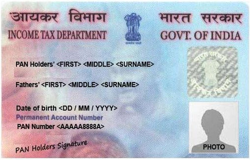

In [90]:
original


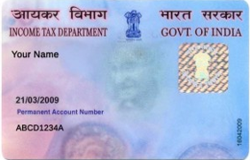

In [91]:
tampered

In [92]:
original-cv2.imread('pan_tampering/image/original.png')
tampered=cv2.imread('pan_tampering/image/tampered.png')


In [94]:
import numpy as np
original_np = np.array(original)
tampered_np = np.array(tampered)

In [95]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original_np, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

computing the structural similarity index of both the images

In [96]:
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM:{}".format(score))

SSIM:0.31669785636782305


In [110]:
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)



creating a bounding rectangle

In [111]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original_np, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered_np, (x, y), (x + w, y + h), (0, 0, 255), 2)

original image


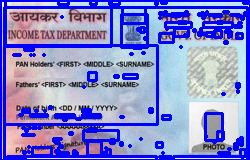

In [112]:
print("original image")
Image.fromarray(original_np)

tampered image


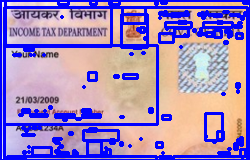

In [113]:
print("tampered image")
Image.fromarray(tampered_np)

difference image


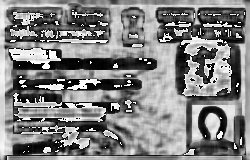

In [114]:
print("difference image")
Image.fromarray(diff)

threashold image


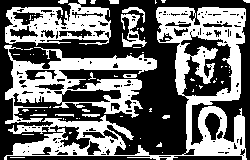

In [115]:
print("threashold image")
Image.fromarray(thresh)